# Problem Statement
Classifying whether Image has a Dog or a Cat. Below is the code of Convolutional Neural network to do the same.Data set have 25000 images of cat and dog for training the model. 

In [1]:
#Import Keras package.
# Sequential pakage is used to initilize our neural network
from keras.models import Sequential
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
'''
# Conv2D is the first step in CNN that is adding convolutional layers.
# Since we are working on image, and images are 2D
'''
from keras.layers import Conv2D

from keras.layers import MaxPooling2D

'''
# Flatten : For flattening the output before entering our fully connected layer.
'''
from keras.layers import Flatten

# Dense : For adding fully connected layer in the network
from keras.layers import Dense
import pandas as pd

In [11]:
model = Sequential()
'''
# Here order of input_shape parameter is important. Number of channel = 3 for color image and 2 for black n white channel
# Next important parameter is activation function, we are using "relu" as we dont want any negative pixel value in feature maps.
'''
model.add(Conv2D(32, (3, 3), input_shape = (128,128,3), activation = 'relu'))
#Next we add a 2D max pooling layer. We simply specify the size of the pooling
#in the x and y directions – (2, 2) in this case.
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a 3rd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening - Taking all pooled feature maps and put them into a single vector. This vector will be huge.
model.add(Flatten())

# FullyConnectedLayer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Need to perform image augmentation step that basically means image pre-processing to prevent over fitting.
# for that we can use ImageDataGenerator() in Keras.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/home/oliver/Documents/DL_Kaggle/Kaggle_DogCat/train',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/home/oliver/Documents/DL_Kaggle/Kaggle_DogCat/validation',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='binary')


Found 20980 images belonging to 2 classes.
Found 4020 images belonging to 2 classes.


# Model 1
First CNN model with steps per epochs = 4000 and validation steps = 1000

In [5]:
model.fit_generator(training_set,
                         steps_per_epoch=4000,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=1000)
model.save_weights('first_try.h5')

Epoch 1/25
4000/4000 [==============================] - 7576s 2s/step - loss: 0.5919 - acc: 0.6759 - val_loss: 0.4465 - val_acc: 0.7888
Epoch 2/25
4000/4000 [==============================] - 1812s 453ms/step - loss: 0.4780 - acc: 0.7740 - val_loss: 0.4026 - val_acc: 0.8148
Epoch 3/25
4000/4000 [==============================] - 2157s 539ms/step - loss: 0.4153 - acc: 0.8142 - val_loss: 0.3167 - val_acc: 0.8635
Epoch 4/25
4000/4000 [==============================] - 2167s 542ms/step - loss: 0.3775 - acc: 0.8331 - val_loss: 0.2839 - val_acc: 0.8860
Epoch 5/25
4000/4000 [==============================] - 1854s 463ms/step - loss: 0.3477 - acc: 0.8488 - val_loss: 0.2702 - val_acc: 0.8816
Epoch 6/25
4000/4000 [==============================] - 1736s 434ms/step - loss: 0.3287 - acc: 0.8574 - val_loss: 0.2640 - val_acc: 0.8933
Epoch 7/25
4000/4000 [==============================] - 1736s 434ms/step - loss: 0.3144 - acc: 0.8649 - val_loss: 0.2496 - val_acc: 0.8950
Epoch 8/25
4000/4000 [========

In [8]:
import numpy as np
from keras.preprocessing import image

In [30]:
img = image.load_img('/home/oliver/Documents/Kaggle/DognCat/test1/34.jpg',target_size=(128, 128))
#Input layer of our CNN model has 3-dimensions so by converting it to array the test image will also 
#become of same dimensin
test_image = image.img_to_array(img)

In [74]:
# Predicting Output for Test DataSet
test_list = range(12500)
l = []
new_list = [x+1 for x in test_list]
for i in new_list:
    path = '/home/oliver/Documents/Kaggle/DognCat/test1/'+ str(i)+'.jpg'
    img = image.load_img(path,target_size=(128, 128))
    test_image = image.img_to_array(img)
    test_image = np.expand_dims(img, axis=0)
    result = model.predict(test_image)
    l.append(int(result[0][0]))
    #print(int(result[0][0]))

In [96]:
# Storing output to the csv file for submission
df = pd.DataFrame({'id':list(test_list),'label':l})
df.to_csv('AS_first.csv',index=False)

,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
5,5,1
6,6,1
7,7,0
8,8,1
9,9,1


# Submission on Kaggle
Got 11.616 Score when submitted on Kaggle for first attempt

# Output For Single Image

In [28]:
#Result will come in 0 or 1 format so in order to know what these value denotes we will check it using class_indices of training set
training_set.class_indices

{'cat': 0, 'dog': 1}

In [23]:
# Predicting Output for Single Image
path = '/home/oliver/Documents/Kaggle/DognCat/test1/45.jpg'
img = image.load_img(path,target_size=(128, 128))
test_image = image.img_to_array(img)
test_image = np.expand_dims(img, axis=0)
result = model.predict(test_image)
if(result[0][0]==1.0):
    print('Predicted Output : Dog')
else:
    print('Predicted Output : Cat')

Predicted Output : Cat


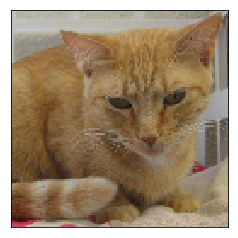

In [24]:
#Original Test Image for the single image
import matplotlib.pyplot as plt

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# Model 2
Second CNN model with different steps per epochs and validation steps

In [5]:
model.fit_generator(training_set,
                         steps_per_epoch=8000,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=2000)
model.save_weights('second_model.h5')

Epoch 1/25
8000/8000 [==============================] - 3568s 446ms/step - loss: 0.5250 - acc: 0.7328 - val_loss: 0.3534 - val_acc: 0.8493
Epoch 2/25
8000/8000 [==============================] - 3573s 447ms/step - loss: 0.3876 - acc: 0.8271 - val_loss: 0.2884 - val_acc: 0.8781
Epoch 3/25
8000/8000 [==============================] - 3551s 444ms/step - loss: 0.3338 - acc: 0.8551 - val_loss: 0.2773 - val_acc: 0.8854
Epoch 4/25
8000/8000 [==============================] - 3558s 445ms/step - loss: 0.2974 - acc: 0.8717 - val_loss: 0.2408 - val_acc: 0.8994
Epoch 5/25
8000/8000 [==============================] - 3557s 445ms/step - loss: 0.2797 - acc: 0.8812 - val_loss: 0.2877 - val_acc: 0.8808
Epoch 6/25
8000/8000 [==============================] - 3555s 444ms/step - loss: 0.2648 - acc: 0.8884 - val_loss: 0.2200 - val_acc: 0.9152
Epoch 7/25
8000/8000 [==============================] - 3579s 447ms/step - loss: 0.2532 - acc: 0.8934 - val_loss: 0.2548 - val_acc: 0.8996
Epoch 8/25
8000/8000 [=====

In [13]:
model.load_weights("second_model.h5")

In [39]:
# Predicting Output for whole Test DataSet
list_2 = range(1,12501)
l2 = []
for i in list_2:
    path = '/home/oliver/Documents/DL_Kaggle/Kaggle_DogCat/test1/'+ str(i)+'.jpg'
    img2 = image.load_img(path,target_size=(128, 128))
    test_image2 = image.img_to_array(img2)
    test_image2 = np.expand_dims(img2, axis=0)
    result2 = model.predict(test_image2)
    l2.append(int(result2[0][0]))

In [40]:
# Storing output to the csv file for submission
df = pd.DataFrame({'id':list(list_2),'label':l2})
df.to_csv('DogCat_1.csv',index=False)